<div><h2><b><center>MANOJ KUMAR - 2048015</b></h2></div>
<div><h3><b><center>P12,P13: Hiearchical Clustering & DBSCAN</b></h3></div>

**Compare and contrast the working of Hiearchical Clustering & DBSCAN on the dataset relevant to your domain.**

###### Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from dataprep.eda import create_report

NumExpr defaulting to 8 threads.


###### Reading the dataset

In [2]:
ckd_df = pd.read_csv('kidney_disease.csv')

#Check the shape
print(ckd_df.shape)

(400, 26)


In [3]:
#check the columns
ckd_df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

###### Rename the columns to have meaningful names

In [4]:
col_dict={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"hemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

ckd_df.rename(columns=col_dict, inplace=True)

#Check the column names again
ckd_df.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'classification'],
      dtype='object')

###### Observing the data

In [5]:
ckd_df.head(11).T

,0,1,2,3,4,5,6,7,8,9,10
id,0,1,2,3,4,5,6,7,8,9,10
age,48,7,62,48,51,60,68,24,52,53,50
blood_pressure,80,50,80,70,80,90,70,NaN,100,90,60
specific_gravity,1.02,1.02,1.01,1.005,1.01,1.015,1.01,1.015,1.015,1.02,1.01
albumin,1,4,2,4,2,3,0,2,3,2,2
sugar,0,0,3,0,0,0,0,4,0,0,4
red_blood_cells,NaN,NaN,normal,normal,normal,NaN,NaN,normal,normal,abnormal,NaN
pus_cell,normal,normal,normal,abnormal,normal,NaN,normal,abnormal,abnormal,abnormal,abnormal
pus_cell_clumps,notpresent,notpresent,notpresent,present,notpresent,notpresent,notpresent,notpresent,present,present,present
bacteria,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent


##### Data DeepDive

In [6]:
for i in ckd_df.drop("id",axis=1).columns:
    print('unique values in "{}":\n'.format(i),ckd_df[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "blood_pressure":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "specific_gravity":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "albumin":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "sugar":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "red_blood_cells":
 [nan 'normal' 'abnormal']
unique values in "pus_cell":
 ['normal' 'abnormal' nan]
unique values in "pus_cell_clumps":
 ['notpresent' 'present' nan]
unique values in "bacteria":
 ['notpresent' 'present' nan]
unique values in "blood_glucose_random":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114

In [7]:
#Replace incorrect values
ckd_df['diabetes_mellitus'] =ckd_df['diabetes_mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
ckd_df['coronary_artery_disease'] = ckd_df['coronary_artery_disease'].replace(to_replace='\tno',value='no')
ckd_df['white_blood_cell_count'] = ckd_df['white_blood_cell_count'].replace(to_replace='\t8400',value='8400')
ckd_df["classification"]=ckd_df["classification"].replace("ckd\t", "ckd")

for i in range(ckd_df.shape[0]):
    if ckd_df.iloc[i,16]=='\t?':
        ckd_df.iloc[i,16]=np.nan
    if ckd_df.iloc[i,16]=='\t43':
        ckd_df.iloc[i,16]='43'
    if ckd_df.iloc[i,17]=='\t?':
        ckd_df.iloc[i,17]=np.nan
    if ckd_df.iloc[i,17]=='\t6200':
        ckd_df.iloc[i,17]= '6200'
    if ckd_df.iloc[i,18]=='\t?':
        ckd_df.iloc[i,18]=np.nan
    if ckd_df.iloc[i,25]=='ckd':
        ckd_df.iloc[i,25]='1'
    if ckd_df.iloc[i,25]=='notckd':
        ckd_df.iloc[i,25]='0'

for i in ckd_df.drop("id",axis=1).columns:
    print('unique values in "{}":\n'.format(i),ckd_df[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "blood_pressure":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "specific_gravity":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "albumin":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "sugar":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "red_blood_cells":
 [nan 'normal' 'abnormal']
unique values in "pus_cell":
 ['normal' 'abnormal' nan]
unique values in "pus_cell_clumps":
 ['notpresent' 'present' nan]
unique values in "bacteria":
 ['notpresent' 'present' nan]
unique values in "blood_glucose_random":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114

In [8]:
# Observing the summarized information of data
ckd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [9]:
ckd_df.iloc[:,-1]=ckd_df.iloc[:,-1].astype('int64')
ckd_df.head(11).T

,0,1,2,3,4,5,6,7,8,9,10
id,0,1,2,3,4,5,6,7,8,9,10
age,48,7,62,48,51,60,68,24,52,53,50
blood_pressure,80,50,80,70,80,90,70,NaN,100,90,60
specific_gravity,1.02,1.02,1.01,1.005,1.01,1.015,1.01,1.015,1.015,1.02,1.01
albumin,1,4,2,4,2,3,0,2,3,2,2
sugar,0,0,3,0,0,0,0,4,0,0,4
red_blood_cells,NaN,NaN,normal,normal,normal,NaN,NaN,normal,normal,abnormal,NaN
pus_cell,normal,normal,normal,abnormal,normal,NaN,normal,abnormal,abnormal,abnormal,abnormal
pus_cell_clumps,notpresent,notpresent,notpresent,present,notpresent,notpresent,notpresent,notpresent,present,present,present
bacteria,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent


In [10]:
print(ckd_df['packed_cell_volume'].unique())
print(ckd_df['white_blood_cell_count'].unique())
print(ckd_df['red_blood_cell_count'].unique())

['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '52' '14' '22' '18' '42' '17' '46' '23' '19'
 '25' '41' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54']
['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '7100' '11800' '9400' '5500' '5800' '13200'
 '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800' '6500'
 '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300' '12400'
 '10500' '4200' '4700' '10900' '8100' '9500' '2200' '12800' '11200'
 '19100' '12300' '16700' '2600' '26400' '8800' '7400' '4900' '8000'
 '12000' '15700' '4100' '5700' '11500' '5400' '10800' '9900' '5200' '5900'
 '9300' '9700' '5100' '6600']
['5.2' nan '3.9' '4.6' '4.4' '5' '4.0' '3.7' '3.8' '3.4' '2.6' '2.8' '4.3'
 '3.2' '3.6' '4' '4.1' '4.9' '2.5' '

In [11]:
mistyped=['packed_cell_volume','white_blood_cell_count','red_blood_cell_count']
for col in mistyped:
        ckd_df[col]=ckd_df[col].astype('float')
                
numeric=[]
for i in ckd_df.columns:
    if ckd_df[i].dtype=='float64':
        numeric.append(i)

numeric 

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'hemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [12]:
ckd_df.drop('id',axis=1,inplace=True)

categoricals=[]

for col in ckd_df.columns:
    if not col in numeric:
        categoricals.append(col)
categoricals.remove('classification')

categoricals

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia']

In [13]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.style as style
style.use('fivethirtyeight')

##### Checking distribution of the numerical features

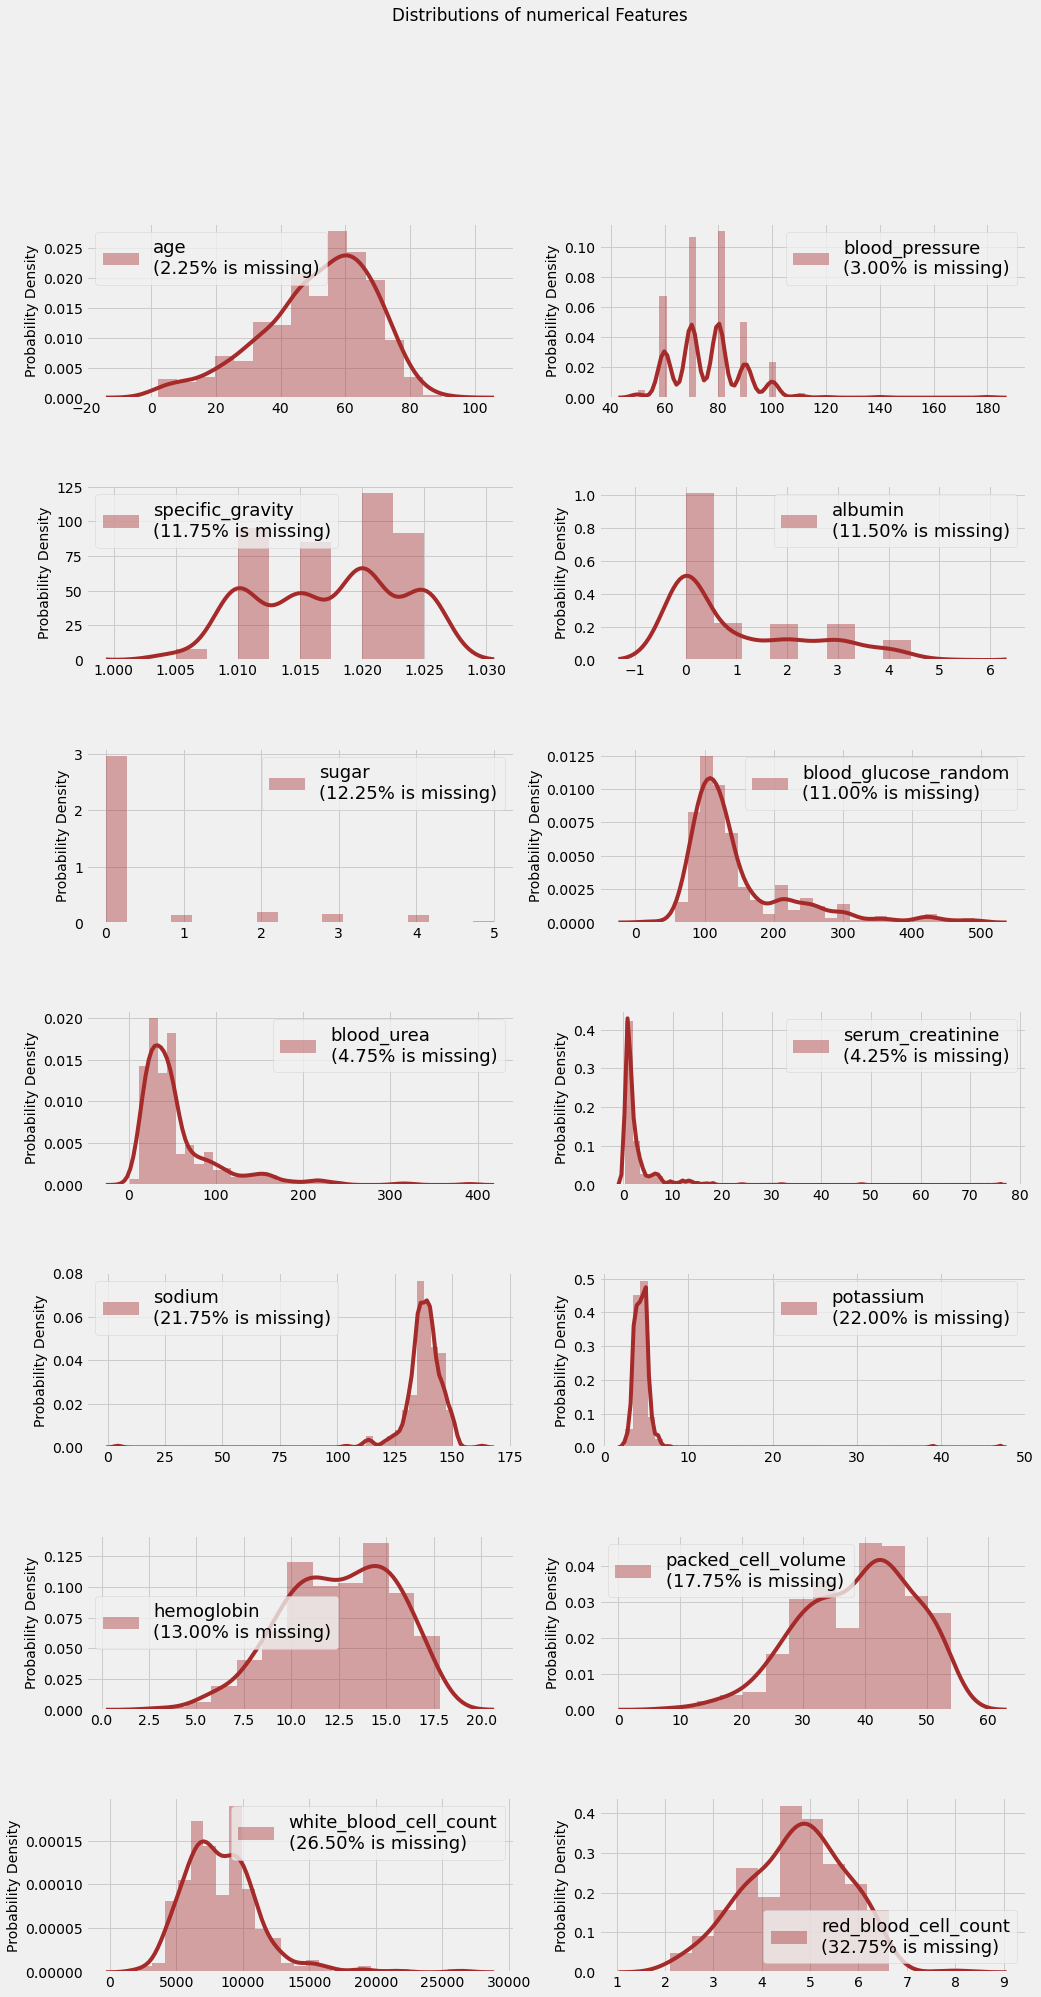

In [14]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15,30))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of numerical Features')

n_rows, n_cols = (7,2)

for index, column in enumerate(numeric):
    
    i,j = (index // n_cols), (index % n_cols)
    miss_perc="%.2f"%(100*(1-(ckd_df[column].dropna().shape[0])/ckd_df.shape[0]))
    collabel=column+"\n({}% is missing)".format(miss_perc)
    fig=sns.distplot(ckd_df[column], color="brown", label=collabel, 
                     norm_hist=True, ax=axes[i,j], kde_kws={"lw":4})
    fig=fig.legend(loc='best', fontsize=18)
    
    axes[i,j].set_ylabel("Probability Density",fontsize='medium')
    axes[i,j].set_xlabel(None)

plt.show()

##### Checking distribution of the Categorical features

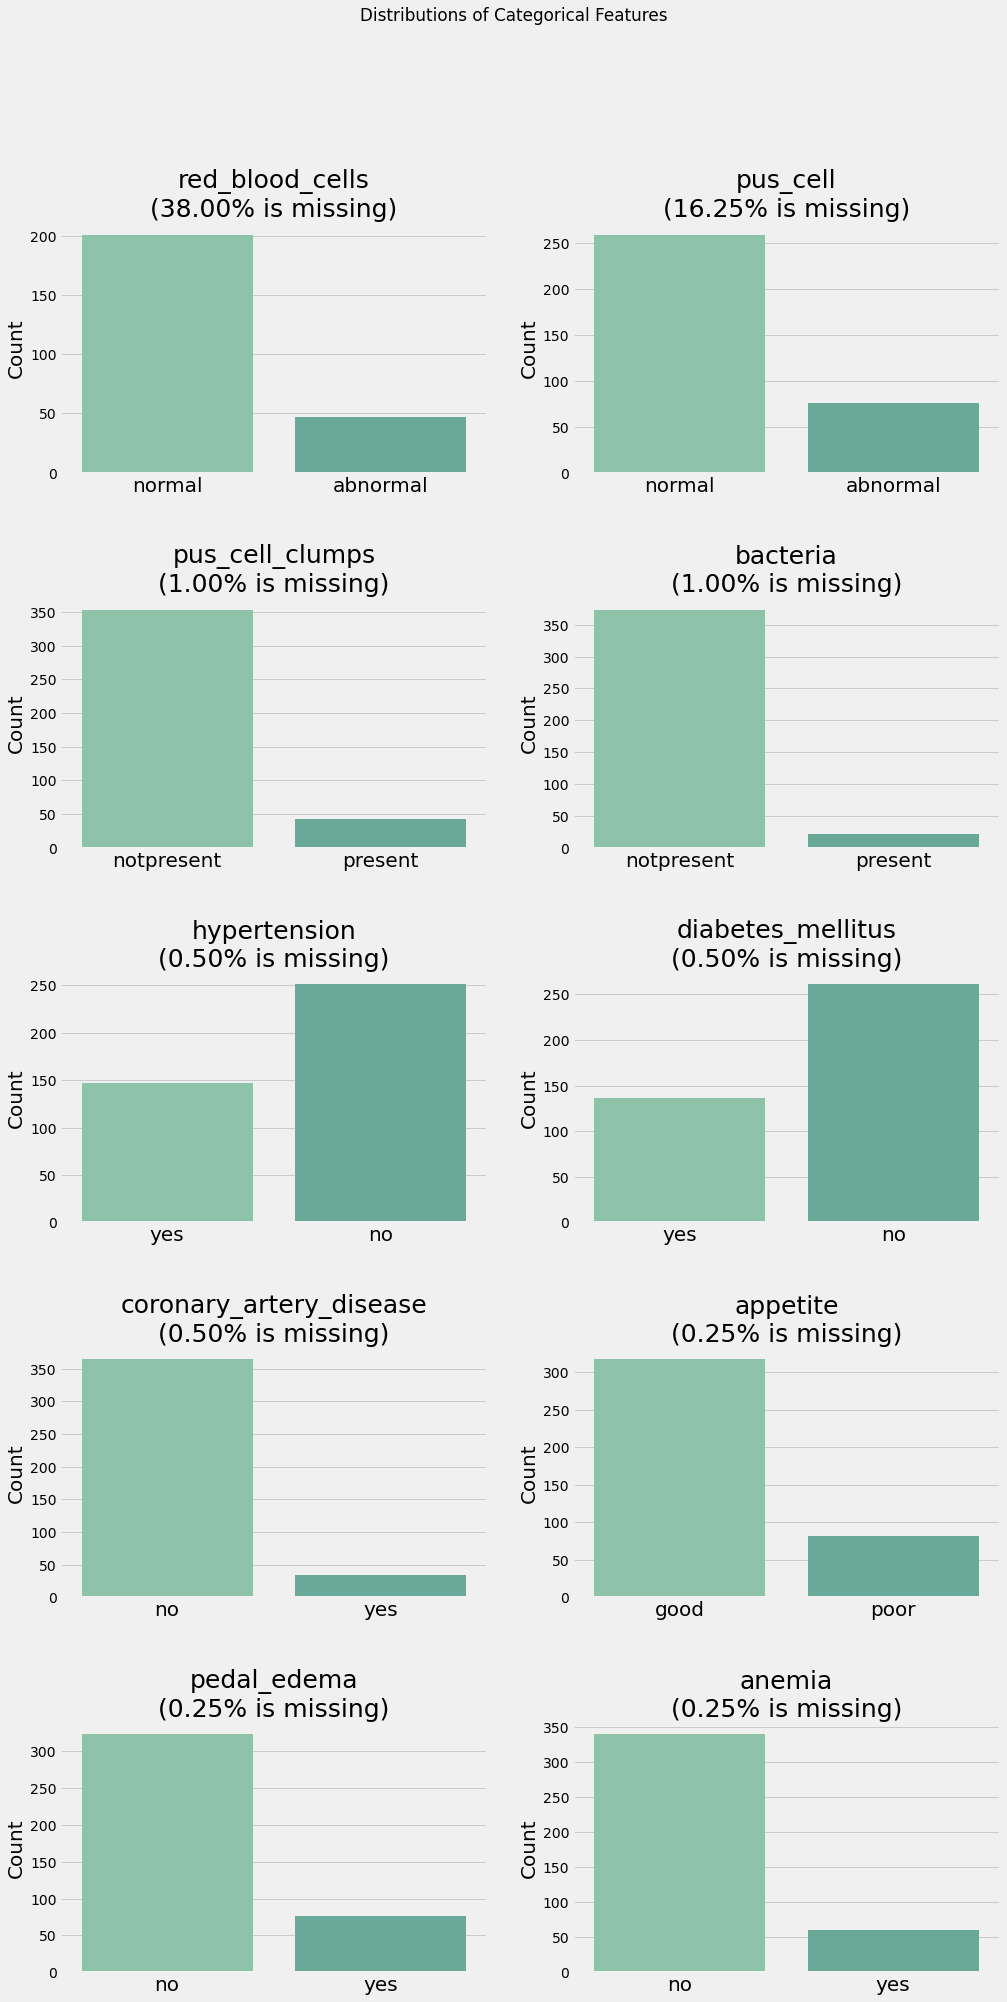

In [15]:
style.use('fivethirtyeight')

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,30))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Categorical Features')

n_rows, n_cols = (5,2)

for index, column in enumerate(categoricals):
    
    i,j = index // n_cols, index % n_cols
    miss_perc="%.2f"%(100*(1-(ckd_df[column].dropna().shape[0])/ckd_df.shape[0]))
    collabel=column+"\n({}% is missing)".format(miss_perc)
    fig = sns.countplot(x=column, data=ckd_df,label=collabel, 
                        palette=sns.cubehelix_palette(rot=-.4,light=0.7,hue=1), ax=axes[i,j])
    
    axes[i,j].set_title(collabel,fontsize=25)
    axes[i,j].set_xlabel(None)
    axes[i,j].set_ylabel("Count",fontsize=20)
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), Fontsize=20)

plt.show()

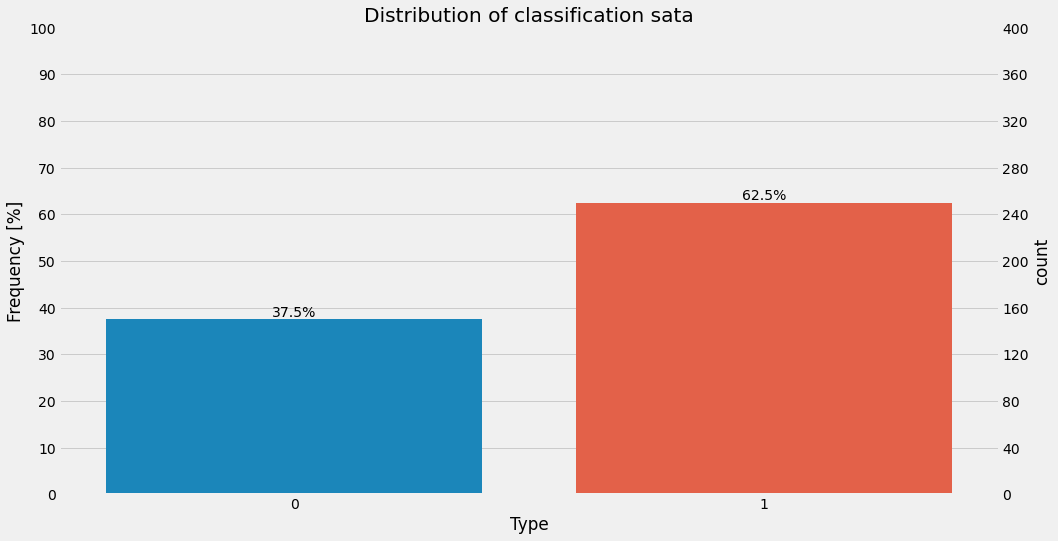

In [16]:
import matplotlib.ticker as ticker
style.use('fivethirtyeight')
# Some random data
ncount = 400

plt.figure(figsize=(15,8))
ax = sns.countplot(x="classification", data=ckd_df)
plt.title('Distribution of classification sata')
plt.xlabel('Type')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

In [17]:
for i in range(ckd_df.shape[0]):
    if ckd_df.iloc[i,24]=='ckd':
        ckd_df.iloc[i,24]='1'
    if ckd_df.iloc[i,24]=='notckd':
        ckd_df.iloc[i,24]='0'

##### Missing Values

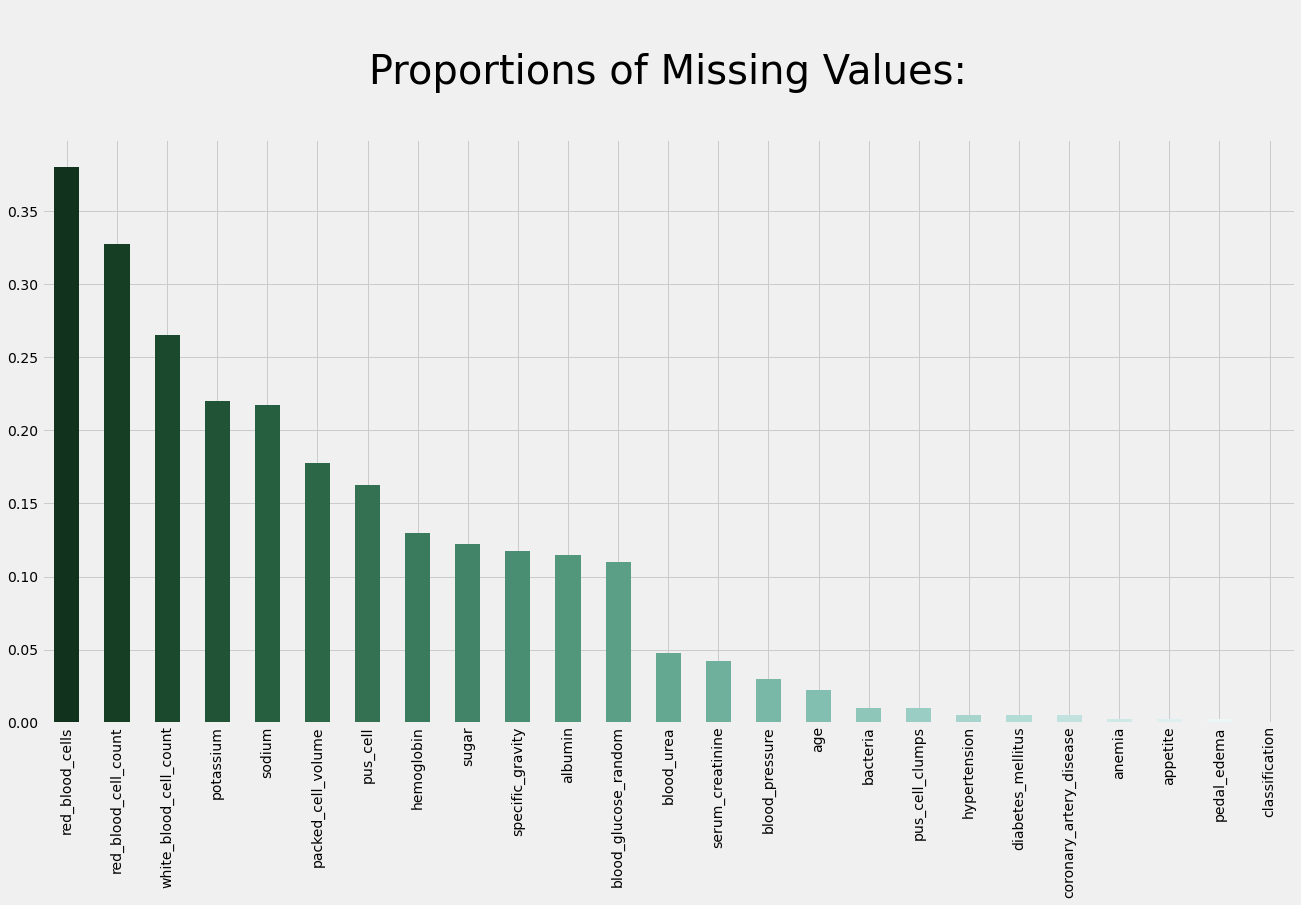

In [18]:
style.use('fivethirtyeight')

d=((ckd_df.isnull().sum()/ckd_df.shape[0])).sort_values(ascending=False)
d.plot(kind='bar',
       color=sns.cubehelix_palette(start=2,
                                    rot=0.15,
                                    dark=0.15,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=24),
        figsize=(20,10))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

In [19]:
ckd_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,48,7,62,48,51,60,68,24,52,53
blood_pressure,80,50,80,70,80,90,70,NaN,100,90
specific_gravity,1.02,1.02,1.01,1.005,1.01,1.015,1.01,1.015,1.015,1.02
albumin,1,4,2,4,2,3,0,2,3,2
sugar,0,0,3,0,0,0,0,4,0,0
red_blood_cells,NaN,NaN,normal,normal,normal,NaN,NaN,normal,normal,abnormal
pus_cell,normal,normal,normal,abnormal,normal,NaN,normal,abnormal,abnormal,abnormal
pus_cell_clumps,notpresent,notpresent,notpresent,present,notpresent,notpresent,notpresent,notpresent,present,present
bacteria,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent
blood_glucose_random,121,NaN,423,117,106,74,100,410,138,70


In [20]:
ckd_df = ckd_df.dropna()
ckd_df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,1
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,1
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,1
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,0
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,0
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,0
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,0


#### Heatmap

A heat map is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space.

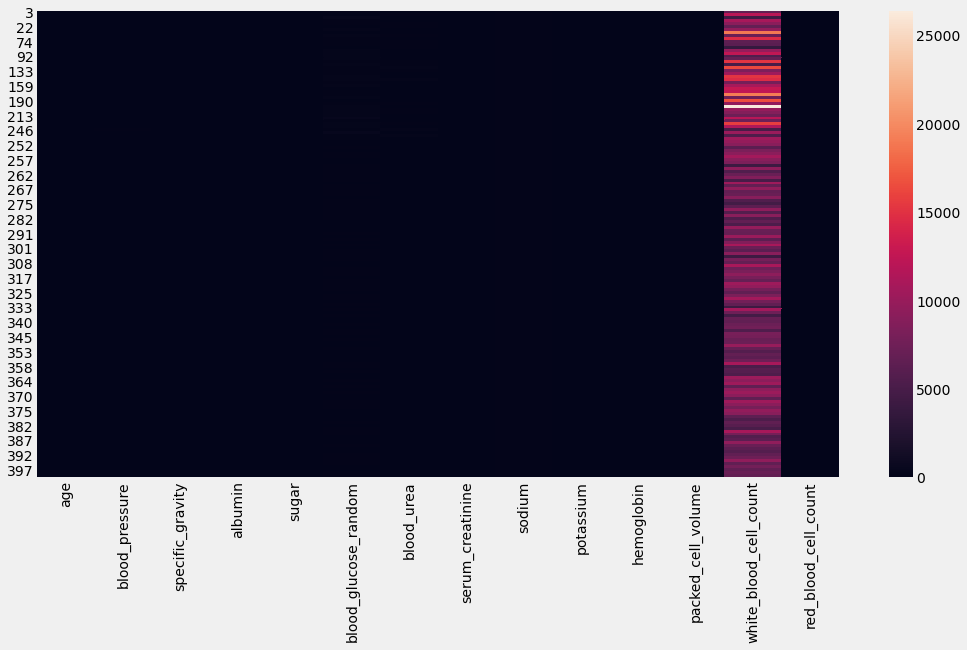

In [21]:
plt.figure(1, figsize = (16 ,8)) 
sns.heatmap(ckd_df[numeric])
plt.show()

##### One-Hot Encoding

In [22]:
onehotdata=pd.get_dummies(ckd_df,drop_first=True,prefix_sep=': ')
onehotdata.head(13).T

,3,9,11,14,20,22,27,48,58,71,74,76,84
age,48.000,53.00,63.00,68.00,61.000,48.000,69.00,73.000,73.00,46.00,56.000,48.000,59.00
blood_pressure,70.000,90.00,70.00,80.00,80.000,80.000,70.00,70.000,80.00,60.00,90.000,80.000,70.00
specific_gravity,1.005,1.02,1.01,1.01,1.015,1.025,1.01,1.005,1.02,1.01,1.015,1.005,1.01
albumin,4.000,2.00,3.00,3.00,2.000,4.000,3.00,0.000,2.00,1.00,2.000,4.000,3.00
sugar,0.000,0.00,0.00,2.00,0.000,0.000,4.00,0.000,0.00,0.00,0.000,0.000,0.00
blood_glucose_random,117.000,70.00,380.00,157.00,173.000,95.000,264.00,70.000,253.00,163.00,129.000,133.000,76.00
blood_urea,56.000,107.00,60.00,90.00,148.000,163.000,87.00,32.000,142.00,92.00,107.000,139.000,186.00
serum_creatinine,3.800,7.20,2.70,4.10,3.900,7.700,2.70,0.900,4.60,3.30,6.700,8.500,15.00
sodium,111.000,114.00,131.00,130.00,135.000,136.000,130.00,125.000,138.00,141.00,131.000,132.000,135.00
potassium,2.500,3.70,4.20,6.40,5.200,3.800,4.00,4.000,5.80,4.00,4.800,5.500,7.60


In [23]:
# define imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

impute_columns=list(set(onehotdata.columns)-set(["classification"]))
print(impute_columns)

['serum_creatinine', 'blood_glucose_random', 'blood_pressure', 'hemoglobin', 'hypertension: yes', 'albumin', 'anemia: yes', 'sugar', 'appetite: poor', 'red_blood_cell_count', 'pus_cell_clumps: present', 'pedal_edema: yes', 'packed_cell_volume', 'potassium', 'coronary_artery_disease: yes', 'sodium', 'pus_cell: normal', 'age', 'specific_gravity', 'bacteria: present', 'red_blood_cells: normal', 'diabetes_mellitus: yes', 'blood_urea', 'white_blood_cell_count']


In [24]:
imputer.fit(onehotdata[impute_columns])     

KNNImputer()

In [25]:
X_trans=pd.DataFrame(imputer.transform(onehotdata[impute_columns]), columns=impute_columns)

In [26]:
X_trans.head(13).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
serum_creatinine,3.800,7.20,2.70,4.10,3.900,7.700,2.70,0.900,4.60,3.30,6.700,8.500,15.00
blood_glucose_random,117.000,70.00,380.00,157.00,173.000,95.000,264.00,70.000,253.00,163.00,129.000,133.000,76.00
blood_pressure,70.000,90.00,70.00,80.00,80.000,80.000,70.00,70.000,80.00,60.00,90.000,80.000,70.00
hemoglobin,11.200,9.50,10.80,5.60,7.700,9.800,12.50,10.000,10.50,9.80,9.100,10.300,7.10
hypertension: yes,1.000,1.00,1.00,1.00,1.000,1.000,1.00,1.000,1.00,1.00,1.000,0.000,1.00
albumin,4.000,2.00,3.00,3.00,2.000,4.000,3.00,0.000,2.00,1.00,2.000,4.000,3.00
anemia: yes,1.000,1.00,0.00,0.00,1.000,1.000,0.00,0.000,0.00,0.00,0.000,0.000,1.00
sugar,0.000,0.00,0.00,2.00,0.000,0.000,4.00,0.000,0.00,0.00,0.000,0.000,0.00
appetite: poor,1.000,1.00,1.00,1.00,1.000,0.000,0.00,0.000,0.00,0.00,0.000,0.000,1.00
red_blood_cell_count,3.900,3.70,3.80,2.60,3.200,3.400,4.10,3.500,4.30,3.20,3.400,4.000,2.10


In [27]:
X_trans # final datset

,serum_creatinine,blood_glucose_random,blood_pressure,hemoglobin,hypertension: yes,albumin,anemia: yes,sugar,appetite: poor,red_blood_cell_count,...,coronary_artery_disease: yes,sodium,pus_cell: normal,age,specific_gravity,bacteria: present,red_blood_cells: normal,diabetes_mellitus: yes,blood_urea,white_blood_cell_count
0,3.8,117.0,70.0,11.2,1.0,4.0,1.0,0.0,1.0,3.9,...,0.0,111.0,0.0,48.0,1.005,0.0,1.0,0.0,56.0,6700.0
1,7.2,70.0,90.0,9.5,1.0,2.0,1.0,0.0,1.0,3.7,...,0.0,114.0,0.0,53.0,1.020,0.0,0.0,1.0,107.0,12100.0
2,2.7,380.0,70.0,10.8,1.0,3.0,0.0,0.0,1.0,3.8,...,0.0,131.0,0.0,63.0,1.010,0.0,0.0,1.0,60.0,4500.0
3,4.1,157.0,80.0,5.6,1.0,3.0,0.0,2.0,1.0,2.6,...,1.0,130.0,0.0,68.0,1.010,1.0,1.0,1.0,90.0,11000.0
4,3.9,173.0,80.0,7.7,1.0,2.0,1.0,0.0,1.0,3.2,...,1.0,135.0,0.0,61.0,1.015,0.0,0.0,1.0,148.0,9200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.5,140.0,80.0,15.7,0.0,0.0,0.0,0.0,0.0,4.9,...,0.0,150.0,1.0,55.0,1.020,0.0,1.0,0.0,49.0,6700.0
154,1.2,75.0,70.0,16.5,0.0,0.0,0.0,0.0,0.0,6.2,...,0.0,141.0,1.0,42.0,1.025,0.0,1.0,0.0,31.0,7800.0
155,0.6,100.0,80.0,15.8,0.0,0.0,0.0,0.0,0.0,5.4,...,0.0,137.0,1.0,12.0,1.020,0.0,1.0,0.0,26.0,6600.0
156,1.0,114.0,60.0,14.2,0.0,0.0,0.0,0.0,0.0,5.9,...,0.0,135.0,1.0,17.0,1.025,0.0,1.0,0.0,50.0,7200.0


#### Hierarchical clustering algorithm is of two types:

i) Agglomerative Hierarchical clustering algorithm or AGNES (agglomerative nesting) and                        
ii) Divisive Hierarchical clustering algorithm or DIANA (divisive analysis).

Both this algorithm are exactly reverse of each other. So we will be covering Agglomerative Hierarchical clustering algorithm in detail.

Agglomerative Hierarchical clustering -This algorithm  works by  grouping  the data one by one on the basis of the  nearest distance measure of all the pairwise distance between the data point. Again distance between the data point is recalculated but which distance to consider when the groups has been formed? For this there are many available methods. Some of them are:

- single-nearest distance or single linkage.
- complete-farthest distance or complete linkage.
- average-average distance or average linkage.
- centroid distance.
- ward's method - sum of squared euclidean distance is minimized.

This way we go on grouping the data until one cluster is formed. Now on the basis of dendogram graph we can calculate how many number of clusters should be actually present.

Algorithmic steps for Agglomerative Hierarchical clustering

Let  X = {x1, x2, x3, ..., xn} be the set of data points.

1) Begin with the disjoint clustering having level L(0) = 0 and sequence number m = 0.

2) Find the least distance pair of clusters in the current clustering, say pair (r), (s), according to d[(r),(s)] = min d[(i),(j)]   where the minimum is over all pairs of clusters in the current clustering.

3) Increment the sequence number: m = m +1.Merge clusters (r) and (s) into a single cluster to form the next clustering m. Set the level of this clustering to L(m) = d[(r),(s)].

4) Update the distance matrix, D, by deleting the rows and columns corresponding to clusters (r) and (s) and adding a row and column corresponding to the newly formed cluster. The distance between the new cluster, denoted (r,s) and old cluster(k) is defined in this way: d[(k), (r,s)] = min (d[(k),(r)], d[(k),(s)]).

5) If all the data points are in one cluster then stop, else repeat from step 2).

Divisive Hierarchical clustering - It is just the reverse of Agglomerative Hierarchical approach.

### Dendrogram

        A dendrogram is a diagram representing a tree. This diagrammatic representation is frequently used in different contexts: in hierarchical clustering, it illustrates the arrangement of the clusters produced by the corresponding analyses.

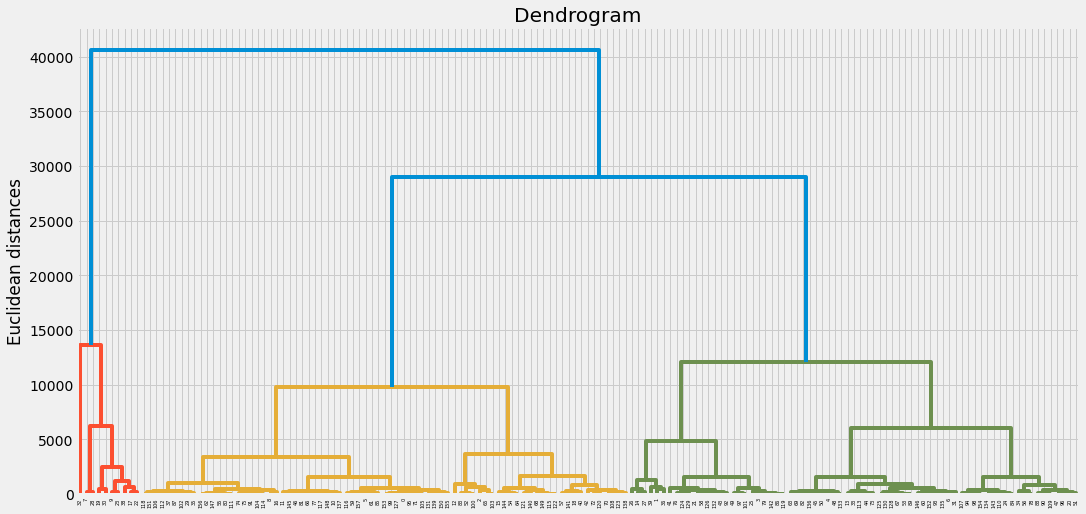

In [28]:
import scipy.cluster.hierarchy as sch

plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(X_trans, method = "ward"))
plt.title('Dendrogram')
plt.xlabel('')
plt.ylabel('Euclidean distances')
plt.show()

Advantages

- No apriori information about the number of clusters required.
- Easy to implement and gives best result in some cases.

Disadvantages

- Algorithm can never undo what was done previously.
- Time complexity of at least O(n2 log n) is required, where ‘n’ is the number of data points.
- Based on the type of distance matrix chosen for merging different algorithms can suffer with one or more of the following:
    i) Sensitivity to noise and outliers            
    ii) Breaking large clusters                
    iii) Difficulty handling different sized clusters and convex shapes           

- No objective function is directly minimized
- Sometimes it is difficult to identify the correct number of clusters by the dendogram.

### DBSCAN

In [35]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors 
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_trans)
distances, indices = nbrs.kneighbors(X_trans)

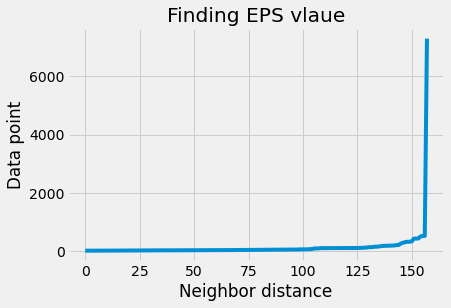

In [33]:
distance=np.sort(distances,axis=0) 
distance=distance[:,1] 
plt.plot(distance) 
plt.xlabel("Neighbor distance") 
plt.ylabel("Data point") 
plt.title("Finding EPS vlaue") 
plt.show()

In [37]:
clustering = DBSCAN(eps=3.4, min_samples=3).fit(X_trans) 
clustering.labels_
clustering

DBSCAN(eps=3.4, min_samples=3)

In [39]:
dbscan = DBSCAN(eps=3.4, min_samples = 2) 
clusters = dbscan.fit_predict(X_trans)

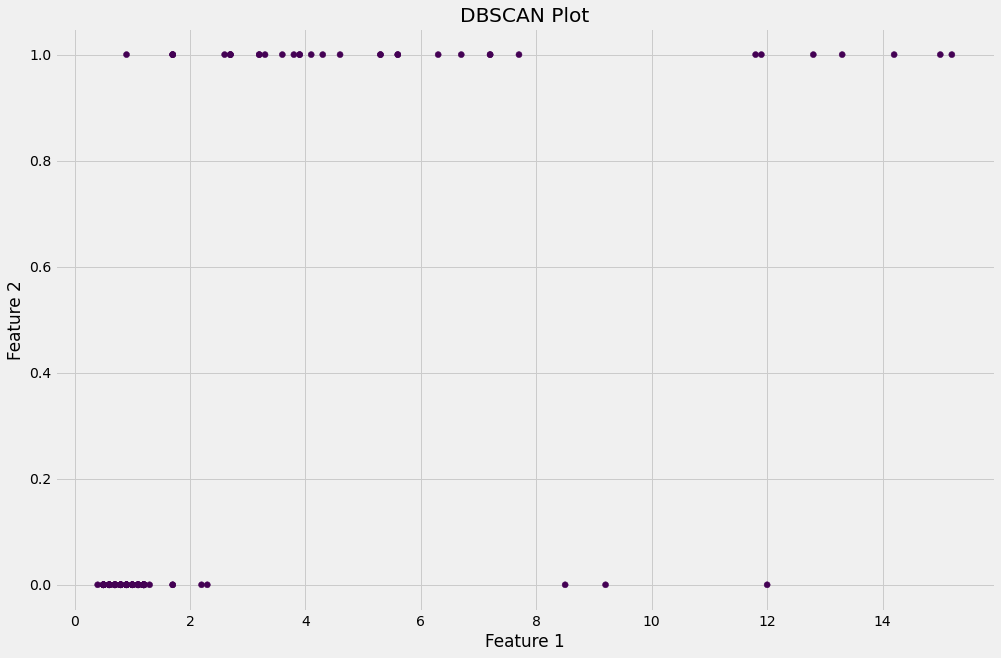

In [40]:
plt.figure(figsize=(15,10))
X=pd.DataFrame(X_trans)
plt.scatter(X.iloc[:,0], X.iloc[:,4], c=clusters) 
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Plot")
plt.show()